In [5]:
%load_ext autoreload
%autoreload 2
    
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "/home/titovaa/code/flydance")
from flydance.analysis.arena import plot_trajectory, load_arena_pickle
# data_folder = '/gpfs/gjor/data/Lab/titova/walking_flies_data/individual_flies/relocation/'
data_folder='results'
#traj_folder = os.path.join(data_folder, 'data_preprocessed') # /clean_flytrax20181123_155818.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
metafile = os.path.join(data_folder, 'generated_meta.tsv')

In [129]:
meta = pd.read_csv(metafile, sep='\t')

In [46]:
meta.head()

,T_inbound,T_outbound,filename,generator_mode,init_vel_x,init_vel_y,mem_loss_k,n_iterations,noise,reward_radius,seed,traj_folder,w_noise
0,0,5000,c06a11c0-607f-11ea-a56f-4f660546c87e.csv.gz,FlyFood,0.5,0.0,0.3,1000,0.15,0,1,results/trajectories,0.05
1,0,5000,c0e8a31e-607f-11ea-a56f-4f660546c87e.csv.gz,FlyFood,0.5,0.0,0.3,1000,0.15,0,1,results/trajectories,0.05
2,0,5000,c1660656-607f-11ea-a56f-4f660546c87e.csv.gz,FlyFood,0.5,0.0,0.3,1000,0.15,0,1,results/trajectories,0.05
3,0,5000,c1e0cbde-607f-11ea-a56f-4f660546c87e.csv.gz,FlyFood,0.5,0.0,0.3,1000,0.15,0,1,results/trajectories,0.05
4,0,5000,c25dfe92-607f-11ea-a56f-4f660546c87e.csv.gz,FlyFood,0.5,0.0,0.3,1000,0.15,0,1,results/trajectories,0.05


In [2]:
traj_folder= os.path.join(data_folder, 'trajectories')

In [3]:
fnames = !ls {traj_folder}

In [4]:
len(fnames)

888

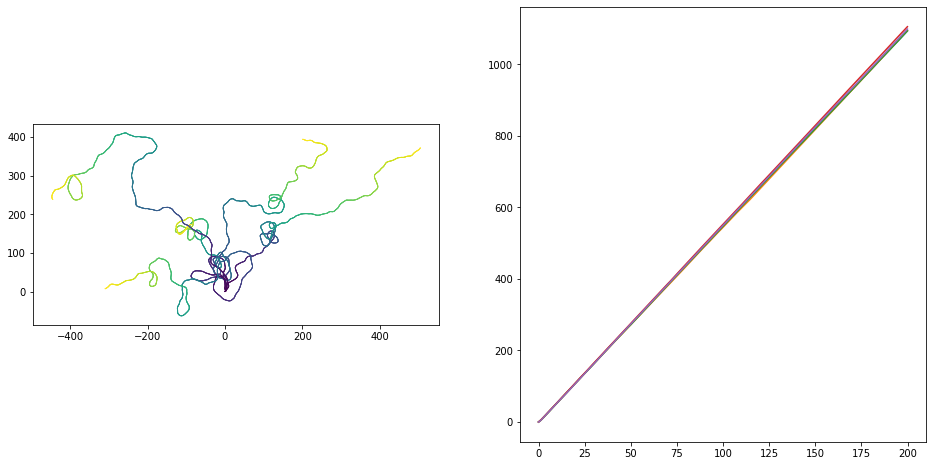

In [66]:
f, axs = plt.subplots(1,2, figsize=(16,8))
for fname in fnames[:5]:
    filename = os.path.join(traj_folder, fname)
    df = pd.read_csv(filename)
    df['sec'] = df.step * 0.1
    df = add_cumulative_distance(df, in_cm=False)
    
    df = df[:2000]
    plot_trajectory(df.x, df.y, axs[0])
    plt.plot(df.sec, df.cum_dist)

In [70]:
1100/200

5.5

In [68]:
traj_folder2= os.path.join(data_folder, 'trajectories/2/')

In [24]:
fnames2 = !ls {traj_folder2}

x: [-856.3345461127752, 1288.690338216561]
y: [-992.726789111116, 1419.1329624887692]


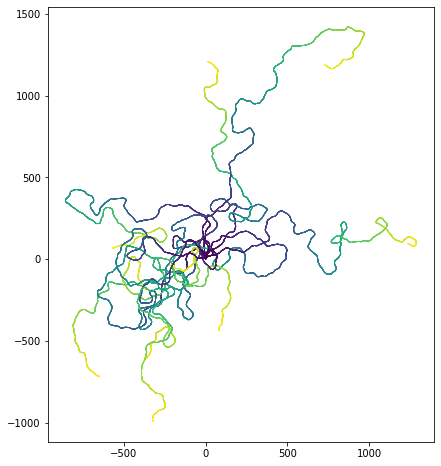

In [32]:
f, ax = plt.subplots(figsize=(8,8))
minx=0
maxx=0
miny=0
maxy=0
for fname in fnames2[:10]:
    filename = os.path.join(traj_folder2, fname)
    df = pd.read_csv(filename)
#     df = df[:2000]
    plot_trajectory(df.x, df.y, ax)
    minx = min(df.x.min(), minx)
    miny = min(df.y.min(), miny)
    maxx = max(df.x.max(), maxx)
    maxy = max(df.y.max(), maxy)
    
print('x: [{}, {}]'.format(minx, maxx))
print('y: [{}, {}]'.format(miny, maxy))

In [17]:
from flydance.analysis.flytrax_utils import add_cumulative_distance

In [18]:
add_cumulative_distance?

In [25]:
cumdists = []
# f, ax = plt.subplots(figsize=(12,8))
for fname in fnames2:
    filename = os.path.join(traj_folder2, fname)
    df = pd.read_csv(filename)
#     df = df[:2000]
    df = add_cumulative_distance(df, in_cm=False)    
#     plot_trajectory(df.x, df.y, ax)
#     ax.plot(df.step, df.cum_dist)
#     print(df.cum_dist.max())
    cumdists.append(df.cum_dist.max())
cumdists = np.array(cumdists)

(array([ 3.,  7., 12., 15., 23., 19., 11.,  5.,  4.,  1.]),
 array([2789.75108538, 2790.6675028 , 2791.58392023, 2792.50033766,
        2793.41675508, 2794.33317251, 2795.24958994, 2796.16600736,
        2797.08242479, 2797.99884222, 2798.91525964]),
 <a list of 10 Patch objects>)

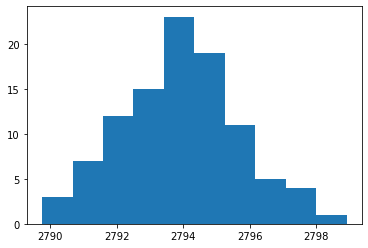

In [26]:
plt.hist(cumdists)

In [27]:
df.step.max()

5001

In [61]:
cumdists.mean()

2793.933979491125

In [28]:
average_velocity = cumdists.mean() / df.step.max()

In [30]:
average_velocity # x/dt

0.5586750608860478

In [33]:
# 0.012 m/s == 1.2 cm/s -- fly speed  from the distribution of vel plotted for GMM analysis (analysis/velocity.png)

In [ ]:
# 2000x = 20 cm => 1cm = 100x -- scale for distances

In [ ]:
# average_velocity*x/tt = 1.2 *100 x/s

In [52]:
tt = average_velocity/(1.2 * 100) # sec

In [53]:
tt

0.004655625507383731

set dt = 0.1 sec. Then average velocity = 0.558 x / 0.1s = 5.58 x / s = 1.2 cm / s => x=1.2/5.58 cm 

In [58]:
cm_to_x = 1.2/5.58 # x =  cm_to_x * cm

In [59]:
cm_to_x

0.2150537634408602

In [60]:
1500* 

1075.268817204301

x: [-460.66236665454596, 416.40775329447337]
y: [-324.11511543064137, 429.10865413032775]


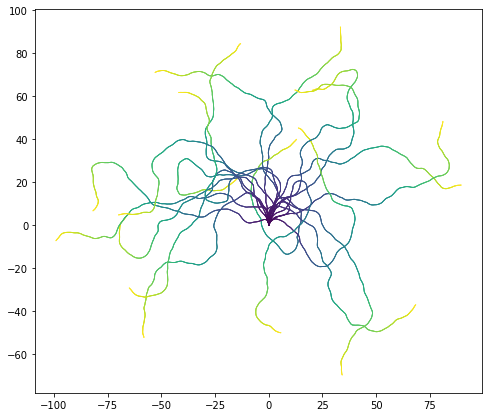

In [64]:
f, ax = plt.subplots(figsize=(8,8))
minx=0
maxx=0
miny=0
maxy=0
for fname in fnames2[:20]:
    filename = os.path.join(traj_folder2, fname)
    df = pd.read_csv(filename)
    df = df[:1000]
    plot_trajectory(df.x * cm_to_x, df.y * cm_to_x, ax)
    minx = min(df.x.min(), minx)
    miny = min(df.y.min(), miny)
    maxx = max(df.x.max(), maxx)
    maxy = max(df.y.max(), maxy)
    
print('x: [{}, {}]'.format(minx, maxx))
print('y: [{}, {}]'.format(miny, maxy))

In [36]:
stim_folder = os.path.join(data_folder, 'trajectories/stim')

In [37]:
fnames_stim = !ls {stim_folder}

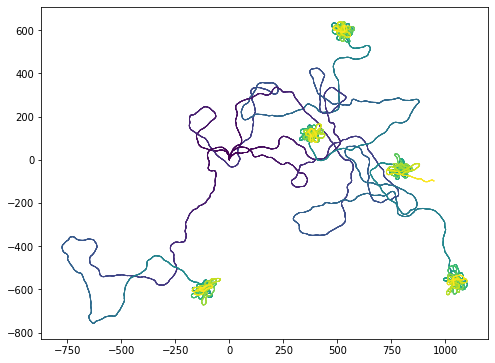

In [47]:
f, ax = plt.subplots(figsize=(8,8))
for fname in fnames_stim[:5]:
    filename = os.path.join(stim_folder, fname)
    df = pd.read_csv(filename)
#     df = df[5000:]
    plot_trajectory(df.x, df.y, ax)    
    

In [48]:
prepost_folder = os.path.join(data_folder, 'trajectories/prepost')

In [49]:
fnames_prepost = !ls {prepost_folder}

Text(0.5, 1.0, 'Reward + memory loss 0.3, 5000/5000, n=0.1, nw=0')

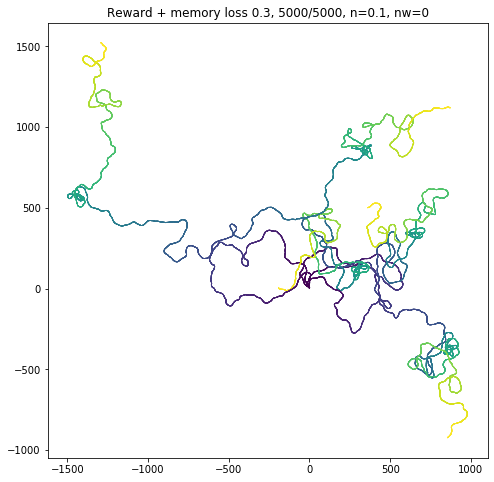

In [71]:
f, ax = plt.subplots(figsize=(8,8))
for fname in fnames_prepost[:5]:
    filename = os.path.join(prepost_folder, fname)
    df = pd.read_csv(filename)
#     df = df[5000:]
    plot_trajectory(df.x, df.y, ax) 
ax.set_title('Reward + memory loss 0.3, 5000/5000, n=0.1, nw=0')

In [72]:
ppn_folder = os.path.join(data_folder, 'trajectories/prepost_noisy')

In [73]:
fnames_ppn = !ls {ppn_folder}

Text(0.5, 1.0, 'Reward + memory loss 0.3, 2000/2000, n=0.1, nw=0.05')

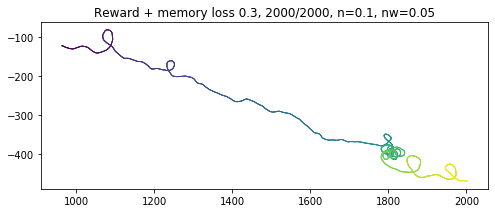

In [77]:
f, ax = plt.subplots(figsize=(8,8))
for fname in fnames_ppn[:1]:
    filename = os.path.join(ppn_folder, fname)
    df = pd.read_csv(filename)
    df = df[3000:7000]
    plot_trajectory(df.x, df.y, ax) 
ax.set_title('Reward + memory loss 0.3, 2000/2000, n=0.1, nw=0.05')

Text(0.5, 1.0, 'Reward + memory loss 0.3, 2000/2000, n=0.15, nw=0.02')

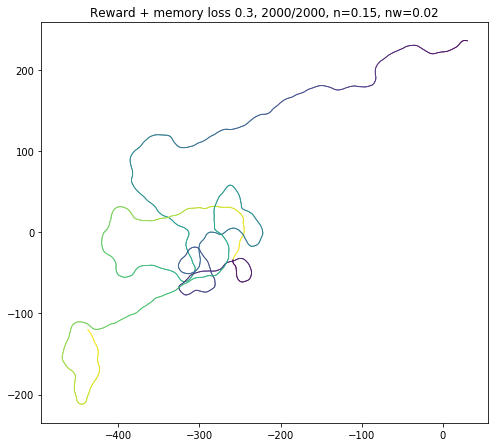

In [82]:
ppn_folder2 = os.path.join(data_folder, 'trajectories/prepost_noisy2')
fnames_ppn2 = !ls {ppn_folder2}
f, ax = plt.subplots(figsize=(8,8))
for fname in fnames_ppn2[:1]:
    filename = os.path.join(ppn_folder2, fname)
    df = pd.read_csv(filename)
    df = df[3000:7000]
    plot_trajectory(df[df.step<=5000].x, df[df.step<=5000].y, ax) 
    plot_trajectory(df[df.step>=5000].x, df[df.step>=5000].y, ax) 
ax.set_title('Reward + memory loss 0.3, 2000/2000, n=0.15, nw=0.02')

In [86]:
# Assume dt = 1/100s , then
# vel = 0.55 x/dt = 1.2 cm/s
# 0.55 x * 100 /s = 1.2 cm/s
k = 1.2/(0.55*100) # cm

In [87]:
k

0.021818181818181813

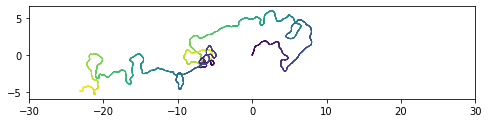

In [91]:
f, ax = plt.subplots(figsize=(8,8))
for fname in fnames_ppn2[:1]:
    filename = os.path.join(ppn_folder2, fname)
    df = pd.read_csv(filename)
#     df = df[3000:7000]
    plot_trajectory(df[df.step<=5000].x * k, df[df.step<=5000].y * k, ax) 
    plot_trajectory(df[df.step>=5000].x * k, df[df.step>=5000].y * k, ax) 
    ax.set_xlim(-30,30)


In [90]:
# 120 sec = 120 * 100 steps =  12000 steps!

In [93]:
    T_outbound=12000,
    T_inbound=12000,
    seed=1,
    noise=0.15,
    w_noise=0.02,
    mem_loss_k=0.125,
    n_iterations=10,
    init_vel_x=0.0,
    init_vel_y=0.1,
    # walk_func=trials.walking,
    traj_folder='results/trajectories/prepost_noisy3/',

Text(0.5, 1.0, 'Reward + memory loss 0.125, 12000/12000, n=0.15, nw=0.02')

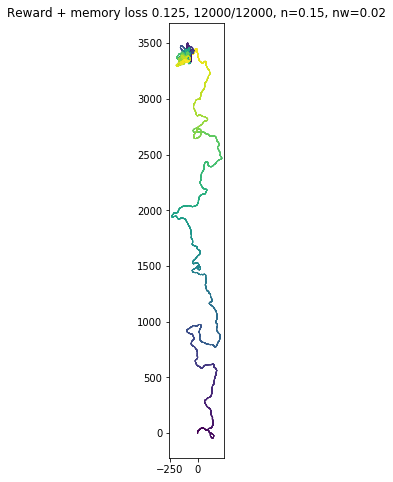

In [95]:
ppn_folder3 = os.path.join(data_folder, 'trajectories/prepost_noisy3')
fnames_ppn3 = !ls {ppn_folder3}
f, ax = plt.subplots(figsize=(8,8))
for fname in fnames_ppn3[:1]:
    filename = os.path.join(ppn_folder3, fname)
    df = pd.read_csv(filename)
#     df = df[3000:7000]
    plot_trajectory(df[df.step<=12000].x, df[df.step<=12000].y, ax) 
    plot_trajectory(df[df.step>=12000].x, df[df.step>=12000].y, ax) 
ax.set_title('Reward + memory loss 0.125, 12000/12000, n=0.15, nw=0.02')

In [96]:
params = dict(
    T_outbound=12000,
    T_inbound=12000,
    seed=1,
    noise=0.15,
    w_noise=0.02,
    mem_loss_k=0.2,
    n_iterations=5,
    init_vel_x=0.0,
    init_vel_y=0.1,
    # walk_func=trials.walking,
    traj_folder='results/trajectories/prepost_memlossfind/',
    reward_radius=0,
    generator_mode='FlyFood')

Text(0.5, 1.0, 'Reward + memory loss 0.2, 12000/12000, n=0.15, nw=0.02')

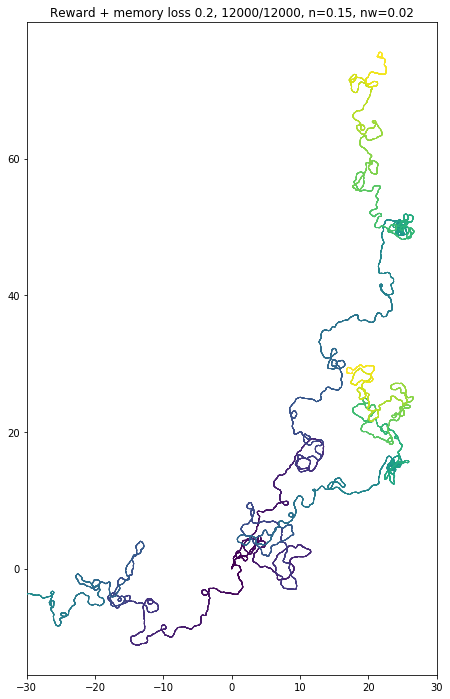

In [102]:
folder = os.path.join(data_folder, 'trajectories/prepost_memlossfind')
fnames = !ls {folder}
f, ax = plt.subplots(figsize=(12,12))
for fname in fnames[:3]:
    filename = os.path.join(folder, fname)
    df = pd.read_csv(filename)
#     df = df[3000:7000]
#     plot_trajectory(df[df.step<=12000].x* k, df[df.step<=12000].y* k, ax) 
#     plot_trajectory(df[df.step>=12000].x* k, df[df.step>=12000].y* k, ax) 
    plot_trajectory(df.x* k, df.y* k, ax) 
    ax.set_xlim(-30,30)
ax.set_title('Reward + memory loss 0.2, 12000/12000, n=0.15, nw=0.02')

Text(0.5, 1.0, 'Reward + memory loss 0.2, 12000/12000, n=0.15, nw=0.015')

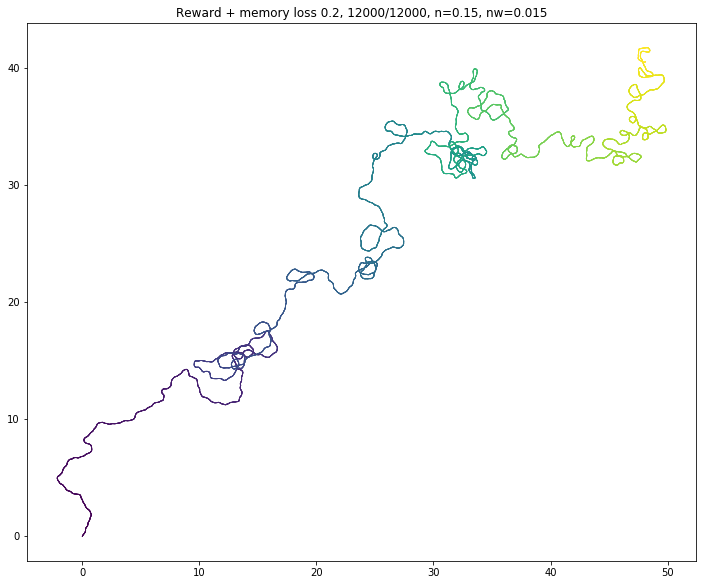

In [109]:

folder = os.path.join(data_folder, 'trajectories/prepost_param')
fnames = !ls {folder}
f, ax = plt.subplots(figsize=(12,12))
for fname in fnames[4:5]:
    filename = os.path.join(folder, fname)
    df = pd.read_csv(filename)
#     df = df[3000:7000]
#     plot_trajectory(df[df.step<=12000].x* k, df[df.step<=12000].y* k, ax) 
#     plot_trajectory(df[df.step>=12000].x* k, df[df.step>=12000].y* k, ax) 
    plot_trajectory(df.x* k, df.y* k, ax) 
#     ax.set_xlim(-30,30)
ax.set_title('Reward + memory loss 0.2, 12000/12000, n=0.15, nw=0.015')

In [113]:
meta[meta.w_noise==0.012]

,T_inbound,T_outbound,filename,generator_mode,init_vel_x,init_vel_y,mem_loss_k,n_iterations,noise,reward_radius,seed,traj_folder,w_noise
1520,12000,12000,53ca2fb6-6190-11ea-a94d-4bc84e2d0b6b.csv.gz,FlyFood,0.0,0.1,0.2,5,0.15,0,1,results/trajectories/prepost_param/,0.012
1521,12000,12000,5625b442-6190-11ea-a94d-4bc84e2d0b6b.csv.gz,FlyFood,0.0,0.1,0.2,5,0.15,0,1,results/trajectories/prepost_param/,0.012
1522,12000,12000,5893b2a6-6190-11ea-a94d-4bc84e2d0b6b.csv.gz,FlyFood,0.0,0.1,0.2,5,0.15,0,1,results/trajectories/prepost_param/,0.012
1523,12000,12000,5b059e46-6190-11ea-a94d-4bc84e2d0b6b.csv.gz,FlyFood,0.0,0.1,0.2,5,0.15,0,1,results/trajectories/prepost_param/,0.012
1524,12000,12000,5d8015ca-6190-11ea-a94d-4bc84e2d0b6b.csv.gz,FlyFood,0.0,0.1,0.2,5,0.15,0,1,results/trajectories/prepost_param/,0.012


In [127]:
def get_files_with_param(param_col, param_value, n_files_max=None):
    filtered_metadata = meta[meta[param_col]==param_value]
    if n_files_max is not None and filtered_metadata.shape[0]>n_files_max:
        filtered_metadata = filtered_metadata.iloc[:n_files_max]

    fnames_result = []
    for i, row in filtered_metadata.iterrows():
        fnames_result.append(os.path.join(row.traj_folder, row.filename))
    return fnames_result

In [117]:
get_files_with_param('w_noise', 0.012)

['results/trajectories/prepost_param/53ca2fb6-6190-11ea-a94d-4bc84e2d0b6b.csv.gz',
 'results/trajectories/prepost_param/5625b442-6190-11ea-a94d-4bc84e2d0b6b.csv.gz',
 'results/trajectories/prepost_param/5893b2a6-6190-11ea-a94d-4bc84e2d0b6b.csv.gz',
 'results/trajectories/prepost_param/5b059e46-6190-11ea-a94d-4bc84e2d0b6b.csv.gz',
 'results/trajectories/prepost_param/5d8015ca-6190-11ea-a94d-4bc84e2d0b6b.csv.gz']

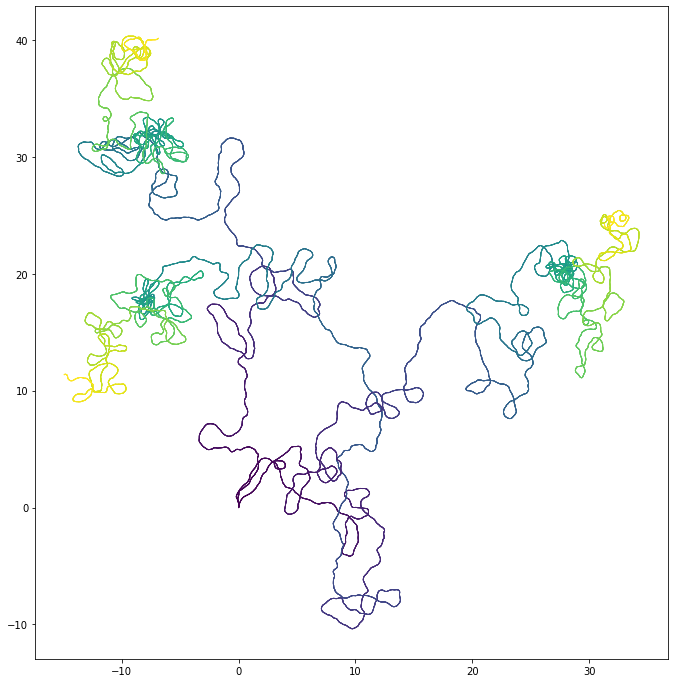

In [123]:
f, ax = plt.subplots(figsize=(12,12))

for fname in get_files_with_param('noise', 0.12, n_files_max=3):
    df = pd.read_csv(fname)
    plot_trajectory(df.x* k, df.y* k, ax) 

In [124]:
# todo: proper parameter search! 


In [143]:
from flydance.analysis.trajectory_descriptors import compute_msd

In [144]:
compute_msd?

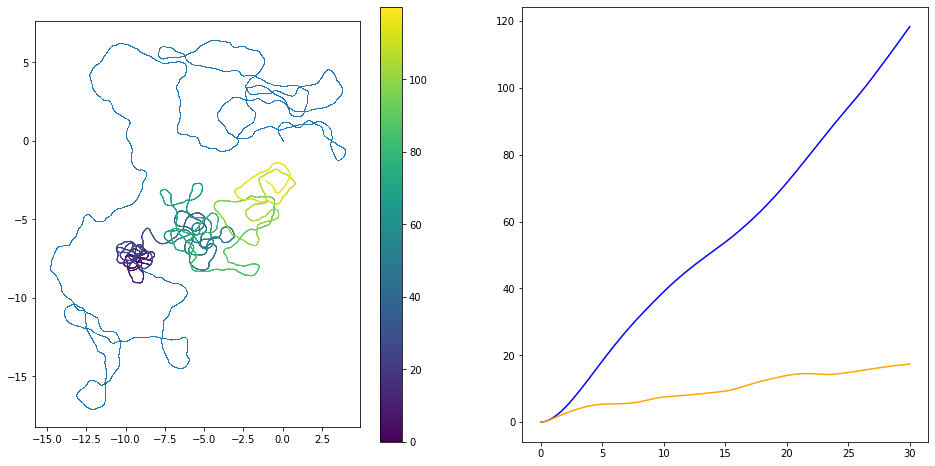

In [147]:
f, axs = plt.subplots(1,2,figsize=(16,8))
files_long = get_files_with_param('T_inbound', 30000)
for fname in files_long[7:8]:
    df = pd.read_csv(fname)
    df['sec'] = df.step / 100
    df['x_cm'] = df.x*k
    df['y_cm'] = df.y*k
    df_pre = df[df.sec <= 120]
    df_post = df[(df.sec >= 120) & (df.sec < 240)]
    msd_pre = compute_msd(df_pre, tcol='sec', xcol='x_cm', ycol='y_cm')
    msd_post = compute_msd(df_post, tcol='sec', xcol='x_cm', ycol='y_cm')
    axs[1].plot(msd_pre['dt'], msd_pre['msd'], color='b')
    axs[1].plot(msd_post['dt'], msd_post['msd'], color='orange')
    plot_trajectory(df_pre.x* k, df_pre.y* k, axs[0], colorful=False)
    clrs = plot_trajectory(df_post.x* k, df_post.y* k, axs[0], colors = df_post.sec-120)
    plt.colorbar(clrs, ax=axs[0])


In [130]:
get_files_with_param('T_inbound', 30000)

['results/trajectories/prepost_long/3c7dcd02-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/40abe44a-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/44cc4ad8-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/48f55cda-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/4d23391c-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/515476f4-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/558c5552-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/59c6b8ba-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/5dec538c-6192-11ea-a441-bfe5b0bd8b4b.csv.gz',
 'results/trajectories/prepost_long/62223368-6192-11ea-a441-bfe5b0bd8b4b.csv.gz']